# MSBA 307_ What is Credit card Fraud Detection, and how can we prevent 

In [1]:
# Fraud Ditection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sms
import statsmodels.api as sm
import statistics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#

In [2]:
df = pd.read_csv('~/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print(f"Columns or Feture names :- \n{df.columns}")

Columns or Feture names :- 
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
print(f"Unique values of target variable :- \n{df['Class'].unique()}")

Unique values of target variable :- 
[0 1]


In [11]:
print(f"Number of samples under each target variable :- \n{df['Class'].value_counts()}")

Number of samples under each target variable :- 
0    284315
1       492
Name: Class, dtype: int64


In [12]:
# Remove irrevlevant columns
df1 = df.drop(['Time'], axis = 1)
print(f"list of feature names agter removing Time Column :- \n{df1.columns}")

list of feature names agter removing Time Column :- 
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [13]:
# Check null or nan values
print(f"Dataset info : \n {df1.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [15]:
# Data Transformaiton
print(f"few values of Amount column: \n {df1['Amount'][0:4]}")

few values of Amount column: 
 0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler
df1['norm_amount'] = StandardScaler().fit_transform(
df1['Amount'].values.reshape(-1,1))
df1 = df1.drop(['Amount'], axis=1)
print(f"few values of Amount column after applying StandardScaler:- \n {df1['norm_amount'][0:4]}")

few values of Amount column after applying StandardScaler:- 
 0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: norm_amount, dtype: float64


In [17]:
# Splitting Dataset
X = df1.drop(['Class'], axis = 1)
y = df1[['Class']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


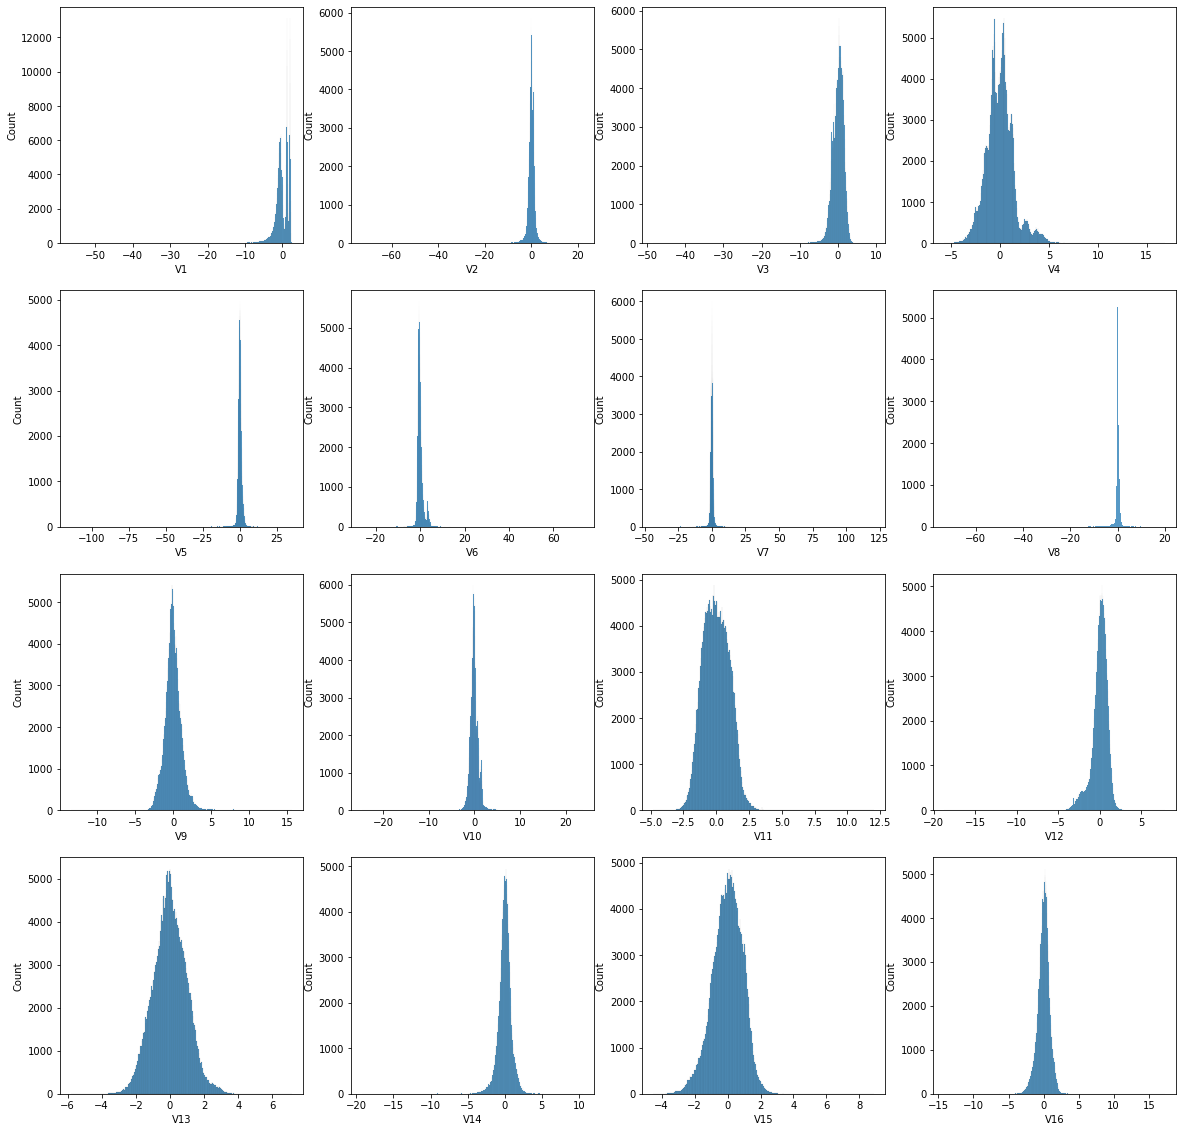

In [26]:
# ERD graphs
f, axes = plt.subplots(4,4, figsize=(20,20))
for ax, feature in zip(axes.flat, df1.columns):
    sns.histplot(df1[feature],ax=ax)

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def decision_tree_classification(X_train, y_train, X_test, y_test):
    # initialize object for DecisionTreeClassifier class
    dt_classifier = DecisionTreeClassifier()
    # train model by using fit method
    print("Model training starts........")
    dt_classifier.fit(X_train, y_train.values.ravel())
    print("Model training completed")
    acc_score = dt_classifier.score(X_test, y_test)
    print(f'Accuracy of model on test dataset :- {acc_score}')
    # predict result using test dataset
    y_pred = dt_classifier.predict(X_test)
    # confusion matrix
    print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")



# calling decision_tree_classification method to train and evaluate model
decision_tree_classification(X_train, y_train, X_test, y_test)

Model training starts........
Model training completed
Accuracy of model on test dataset :- 0.9992860737567735
Confusion Matrix :- 
 [[85271    25]
 [   36   111]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def random_forest_classifier(X_train, y_train, X_test, y_test):
     # initialize object for DecisionTreeClassifier class
     rf_classifier = RandomForestClassifier(n_estimators=50)
     # train model by using fit method
     print("Model training starts........")
     rf_classifier.fit(X_train, y_train.values.ravel())
     acc_score = rf_classifier.score(X_test, y_test)
     print(f'Accuracy of model on test dataset :- {acc_score}')
     # predict result using test dataset
     y_pred = rf_classifier.predict(X_test)
     # confusion matrix
     print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
     # classification report for f1-score
     print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


# calling random_forest_classifier
random_forest_classifier(X_train, y_train, X_test, y_test)

Model training starts........
Accuracy of model on test dataset :- 0.9995435553526912
Confusion Matrix :- 
 [[85290     6]
 [   33   114]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

